# Homework 2 
## Problem 1 
A stochastic Lotka-Volterra (predator-prey) model is given by the following equations for the
abundance of two species,$Y_1$ and $Y_2$, 
$$Y_1 \xrightarrow{c_1} 2Y_1$$
$$Y_1+Y_2\xrightarrow{c_2} 2Y_2$$
$$Y_2\xrightarrow{c_3} \emptyset$$

a) Explain why this is called a predator-prey model. What is the corresponding ODE
model? Given this interpretation, explain whether species 1 or species 2 can exist in
isolation, i.e. in the absence of the other species.

b) Use the Gillespie algorithm to simulate trajectoires from the model. Use $c_1=1$, $c_2=0.005$, and $c_3=0.6$. 

c) Changing which parameter will make it more likely for species 1 to go extinct? What
about species 2? Change these parameters gradually to verify your hypothesis in simulations.

## a) 
This is called a predator prey model because when $Y_1$ and $Y_2$ are together then we lose $Y_1$ which can be logically interpretated as $c_2$ being $Y_2$ eating $Y_1$. SImilarly, $c_3$ shows that if $Y_2$ without $Y_1$ will lead to $Y_2$ going to zero which can be interpreted as $Y_2$ dying if it cannot find $Y_1$ to eat. 

With this relationship, we see that  $Y_2$, the predator, cannot exist without $Y_1$. However, $Y_1$ can exist without $Y_2$ in this model. 

## b)

In [211]:
import numpy as np
import random
from scipy.special import gamma, factorial
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
from numba import njit, prange
import time
from scipy.integrate import solve_ivp
from matplotlib.pyplot import cm

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Extinciton percentage= 1.0


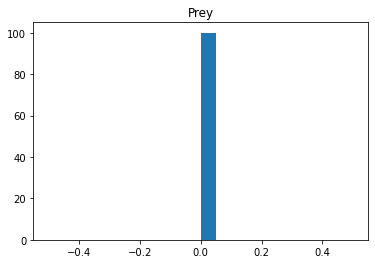

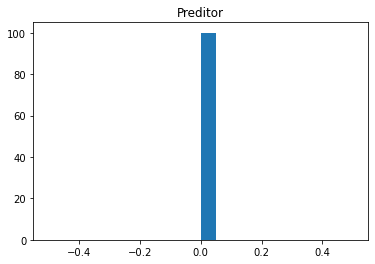

In [202]:
c1=1
c2=0.005
c3=0.6 
t=[0]
extinction=0
final_1=[]
final_2=[]
TotalSteps=10000
v=np.array([[1,0],[-1,1],[0,-1]])
for trial in range(100):
    Y=[]
    Y=np.array([1000,10])
    t=[0]
    i=0   
    while i in range(0,TotalSteps):
        a = np.array([Y[2*i]*c1,(Y[2*i]*Y[2*i+1])*c2,Y[2*i+1]*c3])
        sum_a=np.sum(a)
        if sum_a==0:
            #plt.plot(Y)
           # plt.show()
            extinction=extinction+1
            break
        cum_sum_a=np.cumsum(a,axis=0)
        rand=np.random.uniform(0,1,2)
        j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
        time=(np.log(1/rand[1]))/sum_a
        Y=np.append(Y,Y[2*i:2*i+2]+v[j,:])
        t=np.append(t,[t[i]+time])
        i=i+1
    final_1=np.append(final_1,Y[2*i])
    final_2=np.append(final_2,Y[2*i+1])
print(final_1)
print(final_2)
print('Extinciton percentage=', extinction/(trial+1))
plt.hist(final_1, bins=20)
plt.title("Prey")
plt.show()
plt.hist(final_2, bins=20)
plt.title("Preditor")
plt.show()

We see that with the specific starting conditions of $Y_1=1000$ and $Y_2=10$ that we have 100% extinction rate within the first 10000 steps for our 100 simulations. 
## C)
In order to increase the chances that $Y_1$ does not go extinct with the same starting population, the logical choice is to either decrease $c_2$ or increase $c_1$. Instead of the given $c_2=.005$ lets consider $c_2=0.0005$. 

[10600. 10730. 10456. 10627. 10355. 10478. 10414. 10727. 10065. 10456.
 10405.  9952. 10379. 10141. 10196. 10385. 10422. 10602. 10180. 10468.
 10743. 10486. 10202. 10259. 10032. 10335. 10364.  9734. 10466.  9942.
 10335. 10420. 10500. 10865. 10263.  9892. 10060. 10577. 10379. 10557.
  9872. 10393. 10597. 10334. 10525. 10415. 10553. 10198.  9792.  9949.
 10122. 10765. 10089. 10219. 10673. 10395. 10582. 10760. 10156. 10161.
 10323. 10048. 10372.  9879. 10201. 10597. 10528.  9847. 10488. 10346.
 10597. 10147. 10629. 10333. 10314. 10314. 10814.  9970. 10089. 10210.
 10469. 10337. 10191.  9989. 10673.  9518. 10441. 10562. 10594. 10018.
 10359. 10227. 10431. 10382. 10057. 10002. 10471. 10289. 10507. 10594.]
[156. 100. 216. 135. 262. 208. 246. 103. 368. 210. 234. 432. 250. 339.
 328. 253. 221. 140. 315. 204. 104. 192. 325. 298. 380. 266. 247. 535.
 202. 422. 251. 234. 218.  43. 290. 432. 381. 169. 244. 176. 445. 246.
 165. 265. 198. 235. 169. 318. 470. 420. 374.  90. 368. 309. 130. 242.
 165.

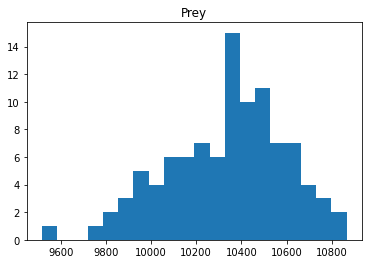

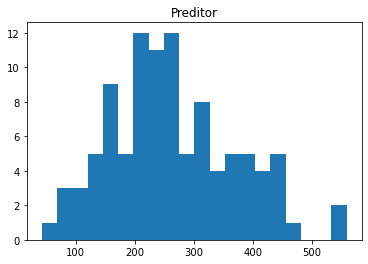

In [204]:
c1=1
c2=0.0005
c3=0.6 
t=[0]
extinction=0
final_1=[]
final_2=[]
TotalSteps=10000
v=np.array([[1,0],[-1,1],[0,-1]])
for trial in range(100):
    Y=[]
    Y=np.array([1000,10])
    t=[0]
    i=0   
    while i in range(0,TotalSteps):
        a = np.array([Y[2*i]*c1,(Y[2*i]*Y[2*i+1])*c2,Y[2*i+1]*c3])
        sum_a=np.sum(a)
        if sum_a==0:
            #plt.plot(Y)
           # plt.show()
            extinction=extinction+1
            break
        cum_sum_a=np.cumsum(a,axis=0)
        rand=np.random.uniform(0,1,2)
        j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
        time=(np.log(1/rand[1]))/sum_a
        Y=np.append(Y,Y[2*i:2*i+2]+v[j,:])
        t=np.append(t,[t[i]+time])
        i=i+1
    final_1=np.append(final_1,Y[2*i])
    final_2=np.append(final_2,Y[2*i+1])
print(final_1)
print(final_2)
print('Extinciton percentage=', extinction/(trial+1))
plt.hist(final_1, bins=20)
plt.title("Prey")
plt.show()
plt.hist(final_2, bins=20)
plt.title("Preditor")
plt.show()

We see that with this change that in zero simulations that the populations go extinct in the first 10000 steps, and both populations increased. The easiest way to garuntee that $Y_1$ doesn't go extinct is by making $c_2$ equal zero or vertually zero. That will make  $Y_2$ go extinct which will make the only possible action that $Y_1$ increases. We see this occur below. 

[10987. 10982. 10987. 10984. 10984. 10988. 10984. 10984. 10988. 10988.
 10985. 10980. 10990. 10989. 10986. 10992. 10985. 10986. 10992. 10991.
 10985. 10990. 10991. 10981. 10987. 10987. 10987. 10986. 10983. 10975.
 10985. 10990. 10993. 10989. 10983. 10982. 10992. 10987. 10989. 10991.
 10992. 10979. 10977. 10981. 10976. 10984. 10977. 10981. 10982. 10989.
 10989. 10989. 10988. 10988. 10989. 10988. 10987. 10989. 10978. 10988.
 10989. 10991. 10990. 10989. 10989. 10978. 10990. 10986. 10990. 10989.
 10992. 10988. 10985. 10992. 10965. 10983. 10988. 10987. 10987. 10983.
 10988. 10987. 10988. 10988. 10985. 10987. 10991. 10990. 10977. 10989.
 10993. 10981. 10981. 10990. 10983. 10991. 10988. 10987. 10984. 10991.]
[ 6.  4.  6.  3.  6.  4.  3.  6.  4.  4.  4.  2.  0.  5.  8.  2.  4.  2.
  2.  4.  4.  3.  1.  3.  0.  3.  3.  8.  5.  0.  7.  6.  3.  5.  5.  4.
  2.  3.  2.  4.  2.  7.  8.  3.  7.  3.  8.  3.  7.  5.  2.  5.  1.  1.
  2.  4.  6.  2. 12.  4.  5.  1.  3.  2.  2. 12.  0.  2.  6.  2.  2.  

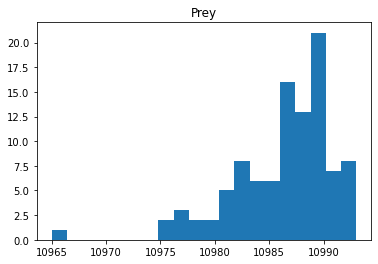

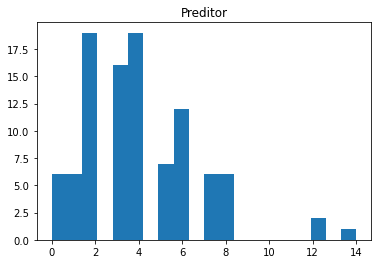

In [205]:
c1=1
c2=0.00005
c3=0.6 
t=[0]
extinction=0
final_1=[]
final_2=[]
TotalSteps=10000
v=np.array([[1,0],[-1,1],[0,-1]])
for trial in range(100):
    Y=[]
    Y=np.array([1000,10])
    t=[0]
    i=0   
    while i in range(0,TotalSteps):
        a = np.array([Y[2*i]*c1,(Y[2*i]*Y[2*i+1])*c2,Y[2*i+1]*c3])
        sum_a=np.sum(a)
        if sum_a==0:
            #plt.plot(Y)
           # plt.show()
            extinction=extinction+1
            break
        cum_sum_a=np.cumsum(a,axis=0)
        rand=np.random.uniform(0,1,2)
        j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
        time=(np.log(1/rand[1]))/sum_a
        Y=np.append(Y,Y[2*i:2*i+2]+v[j,:])
        t=np.append(t,[t[i]+time])
        i=i+1
    final_1=np.append(final_1,Y[2*i])
    final_2=np.append(final_2,Y[2*i+1])
print(final_1)
print(final_2)
print('Extinciton percentage=', extinction/(trial+1))
plt.hist(final_1, bins=20)
plt.title("Prey")
plt.show()
plt.hist(final_2, bins=20)
plt.title("Preditor")
plt.show()

[10993. 10992. 10992. 10995. 10990. 10993. 10993. 10992. 10995. 10992.
 10992. 10995. 10992. 10991. 10994. 10993. 10992. 10993. 10991. 10992.
 10992. 10992. 10993. 10992. 10993. 10992. 10991. 10990. 10994. 10992.
 10993. 10993. 10993. 10993. 10992. 10994. 10993. 10992. 10993. 10992.
 10994. 10991. 10990. 10992. 10992. 10989. 10993. 10990. 10991. 10994.
 10993. 10991. 10992. 10993. 10993. 10992. 10990. 10992. 10993. 10991.
 10993. 10994. 10990. 10991. 10990. 10991. 10993. 10992. 10991. 10991.
 10989. 10992. 10993. 10993. 10991. 10992. 10993. 10992. 10992. 10992.
 10990. 10992. 10992. 10992. 10990. 10991. 10990. 10993. 10994. 10993.
 10992. 10990. 10988. 10993. 10992. 10993. 10989. 10992. 10993. 10991.]
[3. 2. 2. 5. 0. 3. 3. 2. 5. 2. 2. 5. 2. 4. 4. 3. 2. 3. 1. 5. 2. 2. 3. 2.
 3. 2. 1. 0. 4. 2. 3. 3. 3. 3. 5. 4. 3. 2. 3. 2. 4. 4. 3. 2. 2. 2. 3. 3.
 1. 4. 3. 1. 2. 3. 3. 2. 0. 2. 3. 1. 3. 4. 0. 1. 0. 1. 3. 2. 1. 1. 2. 2.
 3. 3. 1. 2. 3. 2. 2. 2. 3. 2. 2. 2. 3. 1. 3. 3. 4. 3. 2. 0. 4. 3. 5. 

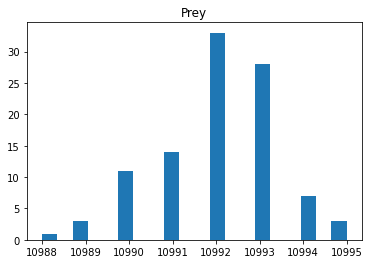

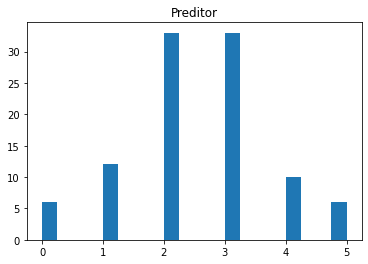

In [206]:
c1=1
c2=0.000005
c3=0.6 
t=[0]
extinction=0
final_1=[]
final_2=[]
TotalSteps=10000
v=np.array([[1,0],[-1,1],[0,-1]])
for trial in range(100):
    Y=[]
    Y=np.array([1000,10])
    t=[0]
    i=0   
    while i in range(0,TotalSteps):
        a = np.array([Y[2*i]*c1,(Y[2*i]*Y[2*i+1])*c2,Y[2*i+1]*c3])
        sum_a=np.sum(a)
        if sum_a==0:
            #plt.plot(Y)
           # plt.show()
            extinction=extinction+1
            break
        cum_sum_a=np.cumsum(a,axis=0)
        rand=np.random.uniform(0,1,2)
        j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
        time=(np.log(1/rand[1]))/sum_a
        Y=np.append(Y,Y[2*i:2*i+2]+v[j,:])
        t=np.append(t,[t[i]+time])
        i=i+1
    final_1=np.append(final_1,Y[2*i])
    final_2=np.append(final_2,Y[2*i+1])
print(final_1)
print(final_2)
print('Extinciton percentage=', extinction/(trial+1))
plt.hist(final_1, bins=20)
plt.title("Prey")
plt.show()
plt.hist(final_2, bins=20)
plt.title("Preditor")
plt.show()

We see that $Y_1$ is almost garunteed to survive and $Y_2$ may go extinct. The only way to garuntee that $Y_2$ doesn't go extinct is to lower $c_3$ to zero. However, we have seen some simulations above where no individuals in $Y_2$ go extinct.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[2039. 2190. 2030. 2113. 2028. 2092. 2151. 2147. 2079. 2142. 2108. 2090.
 2196. 2185. 2207. 2193. 2203. 1875. 2079. 2115. 2015. 2064. 2042. 2036.
 2059. 2092. 2046. 2122. 2063. 2101. 2263. 2046. 2045. 2148. 2113. 2148.
 2112. 2038. 1972. 2062. 2099. 2141. 2014. 2213. 2040. 2138. 2048. 2160.
 2140. 2134. 2130. 2168. 2070. 2028. 1999. 2093. 2057. 2007. 1964. 2068.
 2247. 2072. 1966. 2066. 2099. 2134. 2119. 2212. 2140. 2137. 2074. 2084.
 2088. 2169. 2149. 2077. 2056. 1953. 1978. 2058. 2052. 2099. 2109. 2091.
 2024. 2045. 2052. 2049. 2162. 2123. 2042. 2174. 2132. 2092. 2114. 2098.
 2063. 2049. 1970. 2078.]
Extinciton percentage= 1.0


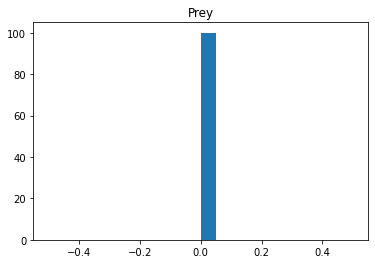

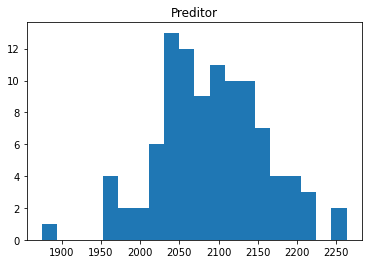

In [207]:
c1=1
c2=0.005
c3=0
t=[0]
extinction=0
final_1=[]
final_2=[]
TotalSteps=10000
v=np.array([[1,0],[-1,1],[0,-1]])
for trial in range(100):
    Y=[]
    Y=np.array([1000,10])
    t=[0]
    i=0   
    while i in range(0,TotalSteps):
        a = np.array([Y[2*i]*c1,(Y[2*i]*Y[2*i+1])*c2,Y[2*i+1]*c3])
        sum_a=np.sum(a)
        if sum_a==0:
            #plt.plot(Y)
            #plt.show()
            extinction=extinction+1
            break
        cum_sum_a=np.cumsum(a,axis=0)
        rand=np.random.uniform(0,1,2)
        j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
        time=(np.log(1/rand[1]))/sum_a
        Y=np.append(Y,Y[2*i:2*i+2]+v[j,:])
        t=np.append(t,[t[i]+time])
        i=i+1
    final_1=np.append(final_1,Y[2*i])
    final_2=np.append(final_2,Y[2*i+1])
print(final_1)
print(final_2)
print('Extinciton percentage=', extinction/(trial+1))
plt.hist(final_1, bins=20)
plt.title("Prey")
plt.show()
plt.hist(final_2, bins=20)
plt.title("Preditor")
plt.show()

We see that $Y_2$ never goes extinct, but because there is no death of $Y_2$ it does eventually cause an extinction of $Y_1$. 

# Problem 2 
Consider the following chemical reaction
$$A\xrightarrow{k}X \xrightarrow{\alpha_1} \emptyset $$
$$B\xrightarrow{k}Y \xrightarrow{\alpha_2} \emptyset $$
$$X+Y \xrightarrow{k_a}C$$

The deterministic set of equations describing this reaction has the form

$$\frac{d[X]}{dt}=k-\alpha_1[X]-k_a[X][Y]$$
$$\frac{d[Y]}{dt}=k-\alpha_1[Y]-k_a[X][Y]$$
where $[\cdot]$ denotes concentration.
## a)


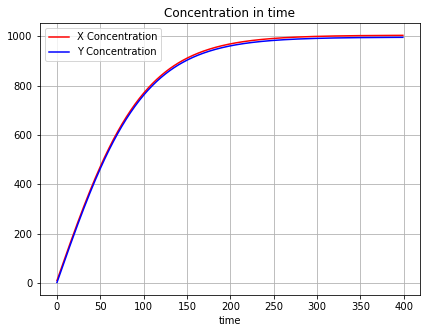

In [228]:
k=10
alpha_1=10**(-6)
alpha_2=10**(-5)
k_a=10**(-5)

def Sys(X, t=0):
    """ The rate equations that describe the BRD switch, """
    # here X[0] = [A] and x[1] = [B]    
    return np.array([ k-alpha_1*X[0]-k_a*X[0]*X[1] ,  k-alpha_1*X[1]-k_a*X[0]*X[1]])
t=np.linspace(0,400,400)
Sys0=np.array([10,2])
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
x,y = X.T
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)

ax1.plot(x, 'r-', label='X Concentration')
ax1.plot(y, 'b-', label='Y Concentration')
ax1.set_title("Concentration in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')



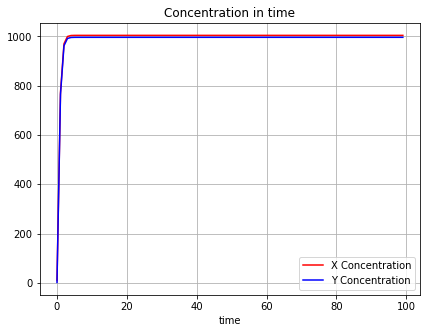

In [227]:
k=10**3
alpha_1=10**(-4)
alpha_2=10**(-3)
k_a=10**(-3)

def Sys(X, t=0):
    # here X[0] = [A] and x[1] = [B]    
    return np.array([ k-alpha_1*X[0]-k_a*X[0]*X[1] ,  k-alpha_1*X[1]-k_a*X[0]*X[1]])
t=np.linspace(0,100,100)
Sys0=np.array([10,2])
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
x,y = X.T
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)

ax1.plot(x, 'r-', label='X Concentration')
ax1.plot(y, 'b-', label='Y Concentration')
ax1.set_title("Concentration in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')



We see that with both of these initial conditions that they both approach the fixed point at approximately 1000. 

## b)

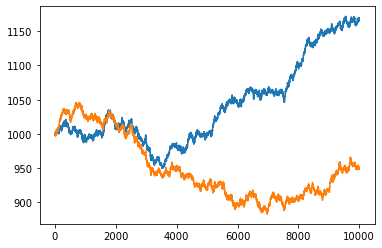

In [256]:
k=10
alpha_1=10**(-6)
alpha_2=10**(-5)
k_a=10**(-5)
v=np.array([[1,0],[-1,0],[0,1],[0,-1],[-1,-1]])
Y=[]

Y=np.array([1000,1000])
x=np.array([Y[0]])
y=np.array([Y[1]])
t=[0]
i=0   
while i in range(0,TotalSteps):
    a = np.array([k,Y[2*i]*alpha_1,k,(Y[2*i+1])*alpha_2,Y[2*i]*Y[2*i+1]*k_a])
    sum_a=np.sum(a)
    cum_sum_a=np.cumsum(a,axis=0)
    rand=np.random.uniform(0,1,2)
    j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
    time=(np.log(1/rand[1]))/sum_a
    Y=np.append(Y,Y[2*i:2*i+2]+v[j,:])
    t=np.append(t,[t[i]+time])
    x=np.append(x,Y[2*i+2])
    y=np.append(y,Y[2*i+3])
    i=i+1
plt.plot(range(0,TotalSteps+1),x)
plt.plot(range(0,TotalSteps+1),y)

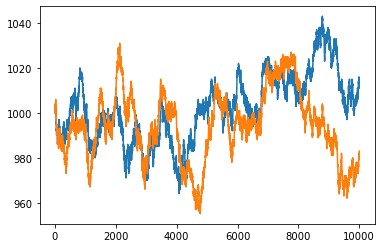

In [255]:
k=10**3
alpha_1=10**(-4)
alpha_2=10**(-3)
k_a=10**(-3)
v=np.array([[1,0],[-1,0],[0,1],[0,-1],[-1,-1]])
Y=[]

Y=np.array([1000,1000])
x=np.array([Y[0]])
y=np.array([Y[1]])
t=[0]
i=0   
while i in range(0,TotalSteps):
    a = np.array([k,Y[2*i]*alpha_1,k,(Y[2*i+1])*alpha_2,Y[2*i]*Y[2*i+1]*k_a])
    sum_a=np.sum(a)
    cum_sum_a=np.cumsum(a,axis=0)
    rand=np.random.uniform(0,1,2)
    j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
    time=(np.log(1/rand[1]))/sum_a
    Y=np.append(Y,Y[2*i:2*i+2]+v[j,:])
    t=np.append(t,[t[i]+time])
    x=np.append(x,Y[2*i+2])
    y=np.append(y,Y[2*i+3])
    i=i+1
plt.plot(range(0,TotalSteps+1),x)
plt.plot(range(0,TotalSteps+1),y)

We see that in our two simulations using the the two different initial conditions that both roughly stay at mean 1000, but the first simulation has higher variance then the second.

## C) 
This is because the constants that effect changes in $X$ and $Y$ are off by a factor of 100. 

# Problem 3
Consider a gene whose product regulates its own transcription (autoregulation). The deter-
ministic set of equations describing mRNA $(r)$ and and protein $(p)$ expression level are given
by:

$$\frac{dr}{dt}=k_l+\phi(p)-\gamma_r,$$
$$\frac{dp}{dt}=rk_p-\gamma_pp$$

where $\phi(p)$ is a function that describes how the rate of mRNA transcription depends on the protein concentration $p$. 
## a) 
 The transition matrix would look like 
 
 $$\left [\begin{array}{ccc}
 \gamma_r &k_1+\phi(p) \\
  \gamma_pp& rk_p  
 \end{array}\right]
 $$
 where the first term column is where $r$ and $p$ decrease by 1, and the second column is where they increase by 1. 

## b) 
Using the function 

$$\phi(p)=\frac{k_0\left ( \frac{p}{k}\right )^n}{1+\left ( \frac{p}{K}\right )^n}$$

and setting $k_l=0$, $\gamma_p=\gamma_r=k_p=k_0=1$ and $K=0.5$. 

n= 1


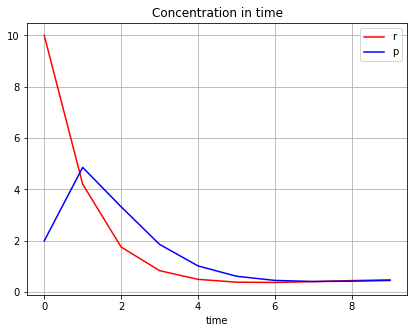

n= 10


C:\Users\mbati\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


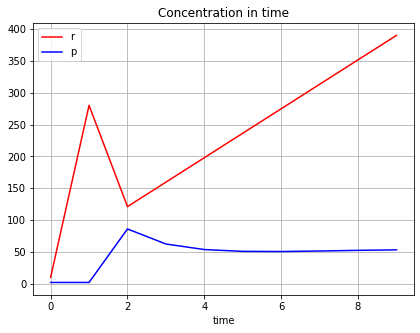

In [275]:
k_p=1
k_0=1
gamma_p=1
gamma_r=1
K=0.5
k_l=0
for n in [1,10]:
    def Sys(X, t=0): 
        # here X[0] = r and x[1] = p  
        return np.array([ k_l+(k_0*(X[0]/K)**n)/(1+(X[1]/K)**n)-gamma_r*X[0] ,  k_p*X[0]-gamma_p*X[1]])
    t=np.linspace(0,10,10)
    Sys0=np.array([10,2])
    X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
    x,y = X.T
    print('n=',n)
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1,2,1)

    ax1.plot(x, 'r-', label='r')
    ax1.plot(y, 'b-', label='p')
    ax1.set_title("Concentration in time")
    ax1.set_xlabel("time")
    ax1.grid()
    ax1.legend(loc='best')
    plt.show()

We see that in the case where $n=1$ there are two fixed points at around 5, and at 0. The fixed point at 5 is unstable and the fixed point at 0 is very stable. In the case where $n=10$ there appears to be no fixed points. 
## c) 
We simulate the above model using the Gillespie algorithm. We see that with both $n=10$ and $n=1$ that the results below are the same. Which is that both $p$ and $r$ will go to zero regardless of the starting condition. 

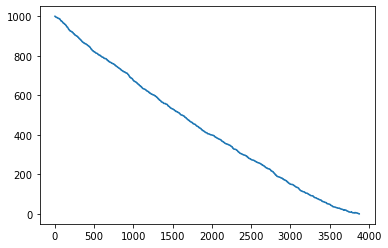

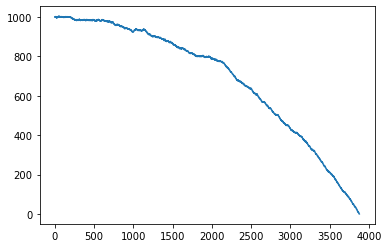

In [317]:
k_p=1
k_0=1
gamma_p=1
gamma_r=1
K=0.5
k_l=0
n=1
v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
X=[]
TotalSteps=10000
X=np.array([1000,1000])
x=np.array([X[0]])
y=np.array([X[1]])
t=[0]
i=0   
while i in range(0,TotalSteps):
    a = np.array([k_l+(k_0*(X[2*i+1]/K)**n)/(1+(X[2*i+1]/K)**n),gamma_r*X[2*i],X[2*i]*k_p,gamma_p*X[2*i+1]])
    sum_a=np.sum(a)
    if sum_a==0:
        break
    cum_sum_a=np.cumsum(a,axis=0)
    rand=np.random.uniform(0,1,2)
    j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
    time=(np.log(1/rand[1]))/sum_a
    X=np.append(X,X[2*i:2*i+2]+v[j,:])
    t=np.append(t,[t[i]+time])
    x=np.append(x,X[2*i+2])
    y=np.append(y,X[2*i+3])
    i=i+1
plt.plot(range(0,i+1),x)
ax1.set_title("r in time")
plt.show()
plt.plot(range(0,i+1),y)
ax1.set_title("p in time")
plt.show()

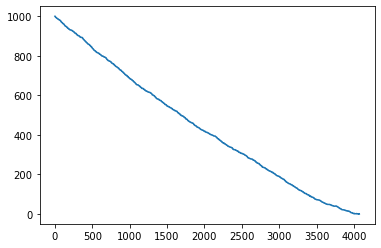

Text(0.5, 1.0, 'p in time')

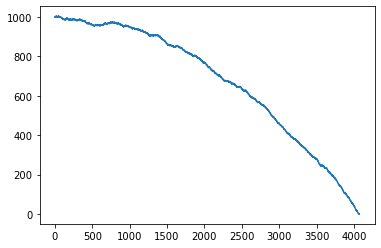

In [318]:
k_p=1
k_0=1
gamma_p=1
gamma_r=1
K=0.5
k_l=0
n=10
v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
X=[]
TotalSteps=10000
X=np.array([1000,1000])
x=np.array([X[0]])
y=np.array([X[1]])
t=[0]
i=0   
while i in range(0,TotalSteps):
    a = np.array([k_l+(k_0*(X[2*i+1]/K)**n)/(1+(X[2*i+1]/K)**n),gamma_r*X[2*i],X[2*i]*k_p,gamma_p*X[2*i+1]])
    sum_a=np.sum(a)
    if sum_a==0:
        break
    cum_sum_a=np.cumsum(a,axis=0)
    rand=np.random.uniform(0,1,2)
    j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
    time=(np.log(1/rand[1]))/sum_a
    X=np.append(X,X[2*i:2*i+2]+v[j,:])
    t=np.append(t,[t[i]+time])
    x=np.append(x,X[2*i+2])
    y=np.append(y,X[2*i+3])
    i=i+1
plt.plot(range(0,i+1),x)
ax1.set_title("r in time")
plt.show()
plt.plot(range(0,i+1),y)
ax1.set_title("p in time")


Next, we use Gillespie algorithm with the negative autoregulation formula
$$\phi(p)=\frac{k_0}{1+\frac{p}{K}^n}
$$
We begin with the constants used in the previous model for $n=1$ and $n=10$. 

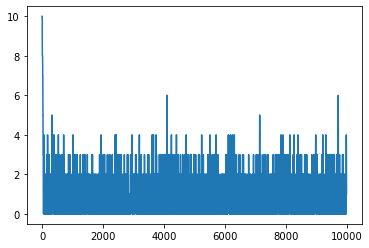

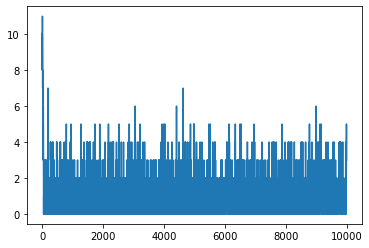

In [311]:
k_p=1
k_0=1
gamma_p=1
gamma_r=1
K=0.5
k_l=0
n=1
v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
X=[]
TotalSteps=10000
X=np.array([10,10])
x=np.array([X[0]])
y=np.array([X[1]])
t=[0]
i=0   
while i in range(0,TotalSteps):
    a = np.array([k_l+(k_0/(1+(X[2*i+1]/K)**n)),gamma_r*X[2*i],X[2*i]*k_p,gamma_p*X[2*i+1] ])
    sum_a=np.sum(a)
    if sum_a==0:
        break
    cum_sum_a=np.cumsum(a,axis=0)
    rand=np.random.uniform(0,1,2)
    j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
    time=(np.log(1/rand[1]))/sum_a
    X=np.append(X,X[2*i:2*i+2]+v[j,:])
    t=np.append(t,[t[i]+time])
    x=np.append(x,X[2*i+2])
    y=np.append(y,X[2*i+3])
    i=i+1
plt.plot(range(0,i+1),x)
ax1.set_title("r in time")
plt.show()
plt.plot(range(0,i+1),y)
ax1.set_title("p in time")
plt.show()

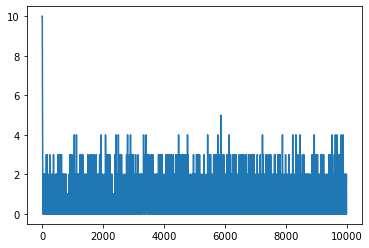

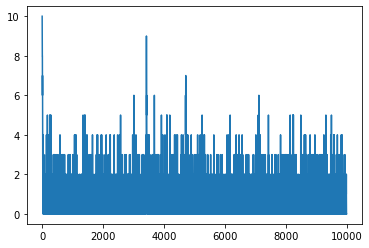

In [313]:
k_p=1
k_0=1
gamma_p=1
gamma_r=1
K=0.5
k_l=0
n=10
v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
X=[]
TotalSteps=10000
X=np.array([10,10])
x=np.array([X[0]])
y=np.array([X[1]])
t=[0]
i=0   
while i in range(0,TotalSteps):
    a = np.array([k_l+(k_0/(1+(X[2*i+1]/K)**n)),gamma_r*X[2*i],X[2*i]*k_p,gamma_p*X[2*i+1] ])
    sum_a=np.sum(a)
    if sum_a==0:
        break
    cum_sum_a=np.cumsum(a,axis=0)
    rand=np.random.uniform(0,1,2)
    j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
    time=(np.log(1/rand[1]))/sum_a
    X=np.append(X,X[2*i:2*i+2]+v[j,:])
    t=np.append(t,[t[i]+time])
    x=np.append(x,X[2*i+2])
    y=np.append(y,X[2*i+3])
    i=i+1
plt.plot(range(0,i+1),x)
ax1.set_title("r in time")
plt.show()
plt.plot(range(0,i+1),y)
ax1.set_title("p in time")
plt.show()

We see that the above both have fluctuation around zero, but do not lead to both $r$ and $p$ going to zero. 


Next, we use the constants such that $k_p=0.17$, $k_0=0.01$, $\gamma_p=0.00028$, $\gamma_r=0.0083$, $k_1=0.001$. Doing part one we use negative autoregulation with $K=100$. 

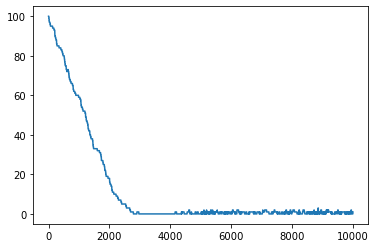

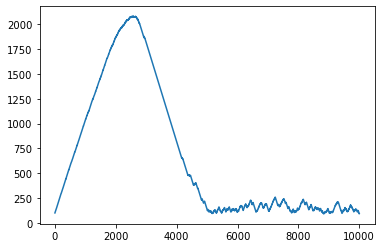

1


In [321]:
k_p=.17
k_0=.01
gamma_p=.00028
gamma_r=.0083
K=100
k_l=0.001
n=10
v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
X=[]
TotalSteps=10000
X=np.array([100,100])
x=np.array([X[0]])
y=np.array([X[1]])
t=[0]
i=0   
while i in range(0,TotalSteps):
    a = np.array([k_l+k_0/(1+(X[2*i+1]/K)**n),gamma_r*X[2*i],X[2*i]*k_p,gamma_p*X[2*i+1]])
    sum_a=np.sum(a)
    if sum_a==0:
        break
    cum_sum_a=np.cumsum(a,axis=0)
    rand=np.random.uniform(0,1,2)
    j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
    time=(np.log(1/rand[1]))/sum_a
    X=np.append(X,X[2*i:2*i+2]+v[j,:])
    t=np.append(t,[t[i]+time])
    x=np.append(x,X[2*i+2])
    y=np.append(y,X[2*i+3])
    i=i+1
plt.plot(range(0,i+1),x)
ax1.set_title("r in time")
plt.show()
plt.plot(range(0,i+1),y)
ax1.set_title("p in time")
plt.show()
print(x[10000])

Here we see that $r$ starts to fluctuate around zero, but $p$ has a great deal of variance until eventually approaching the value around zero as well. 

From there, we then test with $K=10000$. 

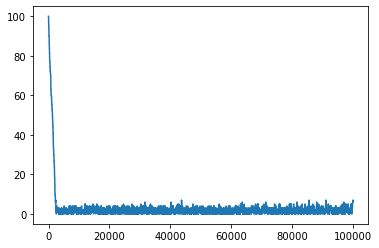

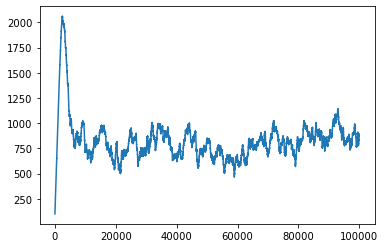

In [322]:
k_p=.17
k_0=.01
gamma_p=.00028
gamma_r=.0083
K=10000
k_l=0.001
n=10
v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
X=[]
TotalSteps=100000
X=np.array([100,100])
x=np.array([X[0]])
y=np.array([X[1]])
t=[0]
i=0   
while i in range(0,TotalSteps):
    a = np.array([k_l+k_0/(1+(X[2*i+1]/K)**n),gamma_r*X[2*i],X[2*i]*k_p,gamma_p*X[2*i+1]])
    sum_a=np.sum(a)
    if sum_a==0:
        break
    cum_sum_a=np.cumsum(a,axis=0)
    rand=np.random.uniform(0,1,2)
    j=np.min(np.where(rand[0]*sum_a<=cum_sum_a))
    time=(np.log(1/rand[1]))/sum_a
    X=np.append(X,X[2*i:2*i+2]+v[j,:])
    t=np.append(t,[t[i]+time])
    x=np.append(x,X[2*i+2])
    y=np.append(y,X[2*i+3])
    i=i+1
plt.plot(range(0,i+1),x)
ax1.set_title("r in time")
plt.show()
plt.plot(range(0,i+1),y)
ax1.set_title("p in time")
plt.show()

We see that with $K=10000$ that $r$ behaves very similarly, but $p$ converges to a higher total closer to $750$. 